In [50]:
import numpy as np
import pandas as pd
np.random.seed(0)
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#!pip install plot_metric
from plot_metric.functions import BinaryClassification
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('insurance_claim.csv', index_col=None)
df.head()

,Age,Status
0,18,0
1,29,0
2,47,1
3,45,1
4,46,1


In [52]:
# Take X as dataframe and y as numpy array
X = df[["Age"]]
X = sm.add_constant(X)
y = df.Status

In [53]:
X.head()

,const,Age
0,1.0,18
1,1.0,29
2,1.0,47
3,1.0,45
4,1.0,46


In [54]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Status, dtype: int64

In statistics, the logit function is the quantile function associated with the standard logistic distribution. It has many uses in data analysis and machine learning, especially in data transformations.

Mathematically, the logit is the inverse of the standard logistic function 
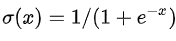

so the logit is defined as
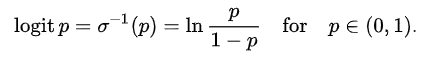

In [55]:
# fittng the data in statatical logistic regression model
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.222163
         Iterations 8


In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                   39
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                  0.6597
Time:                        16:39:38   Log-Likelihood:                -8.6644
converged:                       True   LL-Null:                       -25.460
Covariance Type:            nonrobust   LLR p-value:                 6.798e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.3576      3.537     -3.494      0.000     -19.289      -5.426
Age            0.3371      0.103      3.277      0.001       0.135       0.539
==============================================================================
"""

In [57]:
# from the results we got the values of the intercept(b0) and the slope(b1)
b0= -12.3576
b1= 0.3371
Z=b0+b1*X.Age
calc_prob=np.exp(Z)/(1+np.exp(Z))

In [58]:
calc_prob.head() # calculated probabilty using formula

0    0.001852
1    0.070326
2    0.970290
3    0.943316
4    0.958869
Name: Age, dtype: float64

In [59]:
model.predict(X).head() # probability using model

0    0.001851
1    0.070273
2    0.970251
3    0.943248
4    0.958818
dtype: float64

In [60]:
df["prob_1"]=model.predict(X)

In [61]:
df["prob_0"]=1-df["prob_1"]

https://www.learndatasci.com/glossary/binary-classification/#:~:text=each%20binary%20classifier-,What%20is%20Binary%20Classification%3F,Application

In machine learning, binary classification is a supervised learning algorithm that categorizes new observations into one of two classes.

In [62]:
# visulaising the actual value and probabily of prdicting the value
bc=BinaryClassification(y,model.predict(X),labels=["0","1|"])

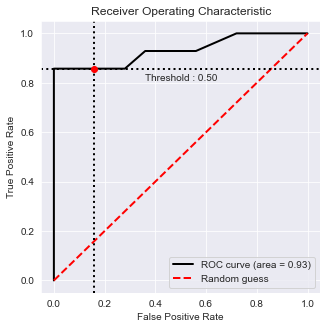

In [63]:
# plotting the figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

AUC ROC stands for “Area Under the Curve” of the “Receiver Operating Characteristic” curve. The AUC ROC curve is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#:~:text=AUC%20ROC%20stands%20for%20%E2%80%9CArea,summary%20of%20the%20ROC%20curve

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

The likelihood function is the probability that the observed values of the dependent variable may be predicted from the observed values of the independent variables. The likelihood varies from 0 to 1. The MLE is the value that maximizes the probability of the observed data.

### Likelihood =  P [Y = 1]* Yi + [1 - P [y = 1]] * (1-Yi)

In [64]:
df["likelihood"]= df.prob_1*y + (1-df.prob_1)*(1-y)

In [65]:
df["log_likelihood"]=np.log(df.likelihood)

In [66]:
th=0.5
# Create empty array to get the predicted class as per the threshold
classify=[]
for i in range(len(y)):
    if model.predict(X)[i]>0.5:
        x=1
        classify.append(x)
    else:
        x=0
        classify.append(x)
print(classify)
        

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [67]:
df["Pred_Class"]=np.array(classify)

In [68]:
df.head(10)

,Age,Status,prob_1,prob_0,likelihood,log_likelihood,Pred_Class
0,18,0,0.001851,0.998149,0.998149,-0.001853,0
1,29,0,0.070273,0.929727,0.929727,-0.072864,0
2,47,1,0.970251,0.029749,0.970251,-0.030200,1
3,45,1,0.943248,0.056752,0.943248,-0.058426,1
4,46,1,0.958818,0.041182,0.958818,-0.042054,1
5,48,1,0.978581,0.021419,0.978581,-0.021651,1
6,45,1,0.943248,0.056752,0.943248,-0.058426,1
7,47,1,0.970251,0.029749,0.970251,-0.030200,1
8,48,1,0.978581,0.021419,0.978581,-0.021651,1
9,45,1,0.943248,0.056752,0.943248,-0.058426,1


In [74]:
# calculating TP,TN,FP, and FN with refence to the actual values
# y actual = 1 and y predicted = 1
TP = sum((y==1)&(df["Pred_Class"]==1))

# y actual = 0 and y predicted = 0
TN = sum((y==0)&(df["Pred_Class"]==0))

# y actual = 0 and y predicted = 1
FP = sum((y==0)&(df["Pred_Class"]==1))

# y actual = 1 and y predicted = 0
FN = sum((y==1)&(df["Pred_Class"]==0))

In [75]:
# confusion matrix
cm=np.mat([[TP,FP],[TN,FN]])
cm

matrix([[12,  0],
        [25,  2]])

In [76]:
# creating an empty data frame 
roc=pd.DataFrame()

# creating an array of threshold to loop ober and find the best threshold

threshold=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for th in threshold:
    classify_pred=np.zeros(len(y),dtype=int)
    for i in range(len(y)):
        if (df["prob_1"][i] > th):
            classify_pred[i]=1
        else:
            classify_pred[i]=0    
           
        # calculating TP,TN,FP, and FN with refence to the actual values

        # y actual = 1 and y predicted = 1
    TP = sum((y==1)&(classify_pred==1))

        # y actual = 0 and y predicted = 0
    TN = sum((y==0)&(classify_pred==0))

        # y actual = 0 and y predicted = 1
    FP = sum((y==0)&(classify_pred==1))

    # y actual = 1 and y predicted = 0
    FN = sum((y==1)&(classify_pred==0))
    
    D={"Threshold":th,"TP":TP,"TN":TN,"FP":FP,"FN":FN}
    roc=roc.append(D,ignore_index=True)

<ipython-input-76-b3620ee0c8b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc=roc.append(D,ignore_index=True)
<ipython-input-76-b3620ee0c8b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc=roc.append(D,ignore_index=True)
<ipython-input-76-b3620ee0c8b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc=roc.append(D,ignore_index=True)
<ipython-input-76-b3620ee0c8b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc=roc.append(D,ignore_index=True)
<ipython-input-76-b3620ee0c8b5>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r

In [77]:
roc

,Threshold,TP,TN,FP,FN
0,0.0,14.0,0.0,25.0,0.0
1,0.1,12.0,18.0,7.0,2.0
2,0.2,12.0,21.0,4.0,2.0
3,0.3,12.0,23.0,2.0,2.0
4,0.4,12.0,25.0,0.0,2.0
5,0.5,12.0,25.0,0.0,2.0
6,0.6,12.0,25.0,0.0,2.0
7,0.7,12.0,25.0,0.0,2.0
8,0.8,12.0,25.0,0.0,2.0
9,0.9,12.0,25.0,0.0,2.0


In [78]:
roc["TPR"]=roc.TP/(roc.TP+roc.FN)
roc["FPR"]=roc.FP/(roc.TN+roc.FP)

In [79]:
roc

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,14.0,0.0,25.0,0.0,1.000000,1.00
1,0.1,12.0,18.0,7.0,2.0,0.857143,0.28
2,0.2,12.0,21.0,4.0,2.0,0.857143,0.16
3,0.3,12.0,23.0,2.0,2.0,0.857143,0.08
4,0.4,12.0,25.0,0.0,2.0,0.857143,0.00
5,0.5,12.0,25.0,0.0,2.0,0.857143,0.00
6,0.6,12.0,25.0,0.0,2.0,0.857143,0.00
7,0.7,12.0,25.0,0.0,2.0,0.857143,0.00
8,0.8,12.0,25.0,0.0,2.0,0.857143,0.00
9,0.9,12.0,25.0,0.0,2.0,0.857143,0.00


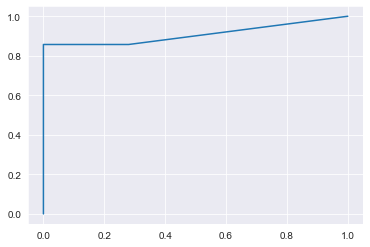

In [80]:
plt.plot(roc.FPR,roc.TPR)

https://towardsdatascience.com/demystifying-roc-curves-df809474529a#:~:text=The%20TPR%20at%20both%20the,we%20should%20choose%20threshold%20%3D%200.5.&text=In%20an%20ROC%20Curve%2C%20the,the%20baseline%20model%2Frandom%20classifier.

In [81]:
# as TPR - FPR is more, threshold is better. one method of selecting threshold is this.
(roc.TPR - roc.FPR)

0     0.000000
1     0.577143
2     0.697143
3     0.777143
4     0.857143
5     0.857143
6     0.857143
7     0.857143
8     0.857143
9     0.857143
10    0.000000
dtype: float64

In [82]:
# for a given threshold th= 0.6 & 0.7, confusion matrix
th= 0.6
roc[roc.Threshold==th][['Threshold','TP','TN','FP','FN']]

,Threshold,TP,TN,FP,FN
6,0.6,12.0,25.0,0.0,2.0


In [83]:
Sum_log_lilekihood=np.sum(df.log_likelihood)
Sum_log_lilekihood

-8.664358257675099

In [84]:
# Solving using sk.learn Library

In [85]:
df = pd.read_csv('insurance_claim.csv', index_col=None)
df.head()

,Age,Status
0,18,0
1,29,0
2,47,1
3,45,1
4,46,1


In [86]:
X = df[['Age']]
y = df.Status

In [87]:
log_reg = LogisticRegression()


In [88]:
model= log_reg.fit(X,y)
model

LogisticRegression()

In [89]:
model.intercept_

array([-12.24021818])

In [90]:
model.coef_

array([[0.33360201]])

In [91]:
model.predict_proba(X)

array([[0.99804495, 0.00195505],
       [0.92862517, 0.07137483],
       [0.03109631, 0.96890369],
       [0.05886321, 0.94113679],
       [0.04288201, 0.95711799],
       [0.02247373, 0.97752627],
       [0.05886321, 0.94113679],
       [0.03109631, 0.96890369],
       [0.02247373, 0.97752627],
       [0.05886321, 0.94113679],
       [0.04288201, 0.95711799],
       [0.03109631, 0.96890369],
       [0.01620209, 0.98379791],
       [0.03109631, 0.96890369],
       [0.92862517, 0.07137483],
       [0.869728  , 0.130272  ],
       [0.869728  , 0.130272  ],
       [0.9620561 , 0.0379439 ],
       [0.99469917, 0.00530083],
       [0.94781489, 0.05218511],
       [0.9620561 , 0.0379439 ],
       [0.63741174, 0.36258826],
       [0.7740551 , 0.2259449 ],
       [0.90310036, 0.09689964],
       [0.97252358, 0.02747642],
       [0.9620561 , 0.0379439 ],
       [0.9620561 , 0.0379439 ],
       [0.7740551 , 0.2259449 ],
       [0.63741174, 0.36258826],
       [0.90310036, 0.09689964],
       [0.

In [92]:
df["prob_1"] = model.predict_proba(X)[:,0]
df["prob_0"] = model.predict_proba(X)[:,1]

In [93]:
df["likelihood"]= df.prob_1*y + (1-df.prob_1)*(1-y)
df["log_likelihood"]=np.log(df.likelihood)

In [94]:
df.head(10)

,Age,Status,prob_1,prob_0,likelihood,log_likelihood
0,18,0,0.998045,0.001955,0.001955,-6.237339
1,29,0,0.928625,0.071375,0.071375,-2.639810
2,47,1,0.031096,0.968904,0.031096,-3.470666
3,45,1,0.058863,0.941137,0.058863,-2.832539
4,46,1,0.042882,0.957118,0.042882,-3.149303
5,48,1,0.022474,0.977526,0.022474,-3.795408
6,45,1,0.058863,0.941137,0.058863,-2.832539
7,47,1,0.031096,0.968904,0.031096,-3.470666
8,48,1,0.022474,0.977526,0.022474,-3.795408
9,45,1,0.058863,0.941137,0.058863,-2.832539


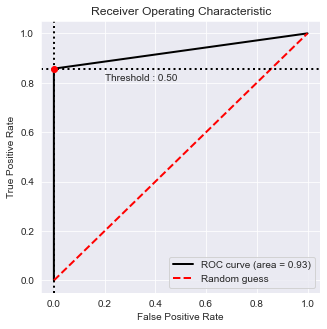

In [95]:
# Visualisation with plot_metric
bc = BinaryClassification(y, model.predict(X), labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [96]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [97]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (df['prob_1'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)

<ipython-input-97-59d13ac1f5bc>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)
<ipython-input-97-59d13ac1f5bc>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)
<ipython-input-97-59d13ac1f5bc>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ROC = df_ROC.append({'Threshold': threshold, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR}, ignore_index=True)
<ipython-input-97-59d13ac1f5bc>:11: FutureWarning: The frame.append method is deprecated an

In [452]:
df_ROC.head(10)

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,14.0,0.0,25.0,0.0,1.000000,1.00
1,0.1,2.0,0.0,25.0,12.0,0.142857,1.00
2,0.2,2.0,0.0,25.0,12.0,0.142857,1.00
3,0.3,2.0,0.0,25.0,12.0,0.142857,1.00
4,0.4,2.0,0.0,25.0,12.0,0.142857,1.00
5,0.5,2.0,0.0,25.0,12.0,0.142857,1.00
6,0.6,2.0,0.0,25.0,12.0,0.142857,1.00
7,0.7,2.0,2.0,23.0,12.0,0.142857,0.92
8,0.8,2.0,4.0,21.0,12.0,0.142857,0.84
9,0.9,2.0,7.0,18.0,12.0,0.142857,0.72


In [453]:
# Compute AUC
auc = roc_auc_score(y, df['prob_1'])
print('AUC:', auc)

AUC: 0.06857142857142856


C:\Users\91810\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


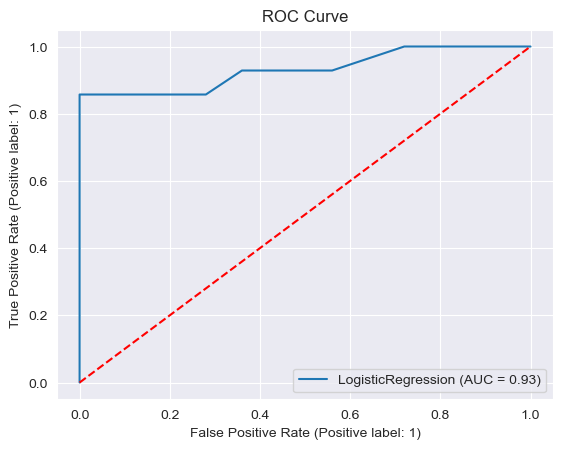

In [457]:
# Plot ROC curve using plot_roc_curve() function
plot_roc_curve(model, X, y)
plt.plot([0, 1], [0, 1], '--', color='r')
plt.title('ROC Curve')
plt.show()

Area Under the ROC curve
The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better. People will sometimes use the AUC as a means for evaluating predictive performance of a model, although because it represents all possible cutoff values, which isn’t feasible in practice, the interpretation is difficult. We recommend interpreting the ROC curve directly as a way to choose a cutoff value.



### for future references

https://medium.com/analytics-vidhya/the-math-behind-logistic-regression-c2f04ca27bca

https://towardsdatascience.com/logistic-regression-explained-from-scratch-visually-mathematically-and-programmatically-eb83520fdf9a

https://www.statisticshowto.com/log-likelihood-function/
    
https://www.statology.org/interpret-log-likelihood/#:~:text=The%20log%2Dlikelihood%20value%20of,negative%20infinity%20to%20positive%20infinity.
    
https://medium.com/@analyttica/log-likelihood-analyttica-function-series-cb059e0d379#:~:text=Log%20Likelihood%20value%20is%20a,Likelihood%20values%20between%20multiple%20models.
    
https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/
    
https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_logistic_roc_curves.htm


    